In [2]:
import os
import random
from IPython.display import clear_output
import skimage
from skimage import transform
from glob import glob
from sklearn import metrics
import pandas as pd
import seaborn as sn
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import io, color
import tqdm
from skimage.transform import *

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [3]:
disease_data = []
disease_class = []
train_disease_data  = []
train_disease_class = []
test_disease_data  = []
test_disease_class = []
IMG_SIZE = (64,64)

<h1> Data Collection </h1>

In [4]:
def collect_data(filepath, label, new_shape):
    all_images = glob(filepath)
    print(len(all_images))
    for item in all_images:
        disease_class.append(label)
        image = skimage.io.imread(item)
        image = color.gray2rgb(image)
        image = skimage.transform.resize(image=image, output_shape=new_shape)
        disease_data.append(np.array(image))

In [5]:
class0 = 'Dataset/AbdomenCT/*.jpeg'
class1 = 'Dataset/ChestCT/*.jpeg'
class2 = 'Dataset/CXR/*.jpeg'
class3 = 'Dataset/Hand/*.jpeg'
class4 = 'Dataset/HeadCT/*.jpeg'

In [6]:
classes_path_list = [class0,class1,class2,class3,class4]
disease_data.clear()
disease_class.clear()
for i in range(len(classes_path_list)):
    collect_data(classes_path_list[i], i, IMG_SIZE)

10000
10000
10000
10000
10000


In [7]:
disease_data[1].shape

(64, 64, 3)

In [8]:
len(disease_class)

50000

<h1> Splitting Dataset For Training(80%) & Testing(20%) purpose </h1>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(disease_data, to_categorical(np.array(disease_class)), test_size = 0.20)

<h1> Defining CNN Model </h1>

In [10]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,3))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<h1> Compile Model </h1>

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<h1> Fit Model </h1>

In [12]:
model_log = model.fit(np.array(X_train), y_train,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_split=.1)

Epoch 1/10
563/563 [==============================] - 186s 326ms/step - loss: 0.0969 - accuracy: 0.9684 - val_loss: 0.0105 - val_accuracy: 0.9977
Epoch 2/10
563/563 [==============================] - 176s 313ms/step - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.0079 - val_accuracy: 0.9975
Epoch 3/10
563/563 [==============================] - 164s 292ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0056 - val_accuracy: 0.9980
Epoch 4/10
563/563 [==============================] - 178s 317ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0080 - val_accuracy: 0.9983
Epoch 5/10
563/563 [==============================] - 162s 289ms/step - loss: 0.0061 - accuracy: 0.9984 - val_loss: 0.0072 - val_accuracy: 0.9980
Epoch 6/10
563/563 [==============================] - 164s 290ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0050 - val_accuracy: 0.9983
Epoch 7/10
563/563 [==============================] - 166s 294ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.0031 -

<h1> Evaluate Model </h1>

In [13]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

313/313 [==============================] - 10s 33ms/step - loss: 0.0029 - accuracy: 0.9991
Test_Accuracy: 99.91%


<h2> Result </h2>

<table style="width:50%; font-size:16px">
  <thead>
    <tr>
      <th></th>
      <th>Accuracy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Test Data</td>
      <td>91.91%</td>
    </tr>
  </tbody>
</table>

<h1> Plotting </h1>

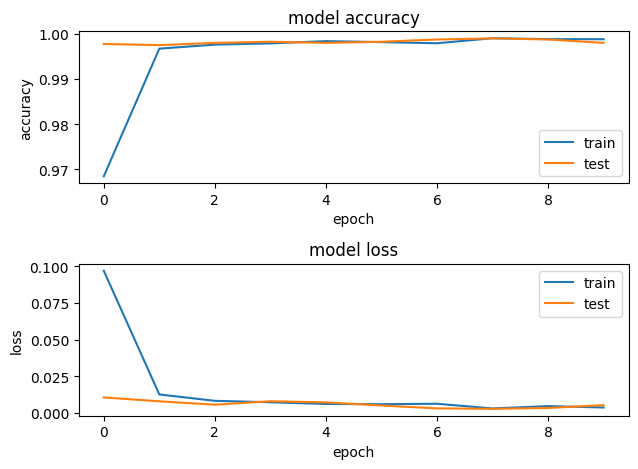

In [14]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()